In [19]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
%matplotlib inline
glims = pd.read_csv('clean_ids.csv', index_col=False)
coordinates = pd.read_csv('LatLong_GLIMS.csv')
pd.set_option('display.max_rows', 500)


glims.head(5)


,ANLYS_ID,GLAC_ID,AREA,DB_AREA,WIDTH,LENGTH,PRIMECLASS,MIN_ELEV,MEAN_ELEV,MAX_ELEV,...,REC_STATUS,GLAC_NAME,WGMS_ID,LOCAL_ID,GLAC_STAT,GEOG_AREA,PARENT_ID,DATE,YEAR,MONTH
0,101215,G286929E46788S,12.4259,12.4292,0.0,4786.66,0,0,0,0,...,okay,None,None,CLGC-9,exists,Antarctic Peninsula,NaN,2007-09-06 00:00:00,2007,9
1,101886,G286929E46788S,13.1393,13.1428,0.0,4786.66,0,0,0,0,...,okay,None,None,CLGC-9,exists,Antarctic Peninsula,NaN,2001-08-04 00:00:00,2001,8
2,102506,G286929E46788S,15.3202,15.3244,0.0,5285.27,0,0,0,0,...,okay,None,None,CLGC-9,exists,Antarctic Peninsula,NaN,1870-01-01 00:00:00,1870,1
3,107884,G286929E46788S,13.6053,13.6089,0.0,5270.57,0,0,0,0,...,okay,None,None,CLGC-9,exists,Antarctic Peninsula,NaN,1986-01-14 00:00:00,1986,1
4,101146,G286719E46755S,80.2842,80.3127,0.0,10225.60,0,0,0,0,...,okay,None,None,NPI-32,exists,Antarctic Peninsula,NaN,2007-09-06 00:00:00,2007,9


In [20]:
glims = glims.merge(coordinates, how='left', left_on='GLAC_ID', right_on='glacier_id')
#only run this once, it will create duplicate merges 

In [21]:
print(len(glims))
print(len(coordinates))

21442
253867


In [22]:
glims.rename(columns={'X':'longitude', 'Y': 'latitude', 'glacier_id':'lat_glac_id', 'Unnamed: 3':'drop'}, inplace = True)

In [23]:
print(list(glims))
glims.head(5)
glims = glims.drop(['lat_glac_id', 'drop'], axis=1) #drops unnecessary values from coordinates DF 
glims.head(10)

['ANLYS_ID', 'GLAC_ID', 'AREA', 'DB_AREA', 'WIDTH', 'LENGTH', 'PRIMECLASS', 'MIN_ELEV', 'MEAN_ELEV', 'MAX_ELEV', 'SRC_DATE', 'REC_STATUS', 'GLAC_NAME', 'WGMS_ID', 'LOCAL_ID', 'GLAC_STAT', 'GEOG_AREA', 'PARENT_ID', 'DATE', 'YEAR', 'MONTH', 'longitude', 'latitude', 'lat_glac_id', 'drop']


,ANLYS_ID,GLAC_ID,AREA,DB_AREA,WIDTH,LENGTH,PRIMECLASS,MIN_ELEV,MEAN_ELEV,MAX_ELEV,...,WGMS_ID,LOCAL_ID,GLAC_STAT,GEOG_AREA,PARENT_ID,DATE,YEAR,MONTH,longitude,latitude
0,101215,G286929E46788S,12.4259,12.4292,0.0,4786.66,0,0,0,0,...,None,CLGC-9,exists,Antarctic Peninsula,NaN,2007-09-06 00:00:00,2007,9,-73.071,-46.788
1,101886,G286929E46788S,13.1393,13.1428,0.0,4786.66,0,0,0,0,...,None,CLGC-9,exists,Antarctic Peninsula,NaN,2001-08-04 00:00:00,2001,8,-73.071,-46.788
2,102506,G286929E46788S,15.3202,15.3244,0.0,5285.27,0,0,0,0,...,None,CLGC-9,exists,Antarctic Peninsula,NaN,1870-01-01 00:00:00,1870,1,-73.071,-46.788
3,107884,G286929E46788S,13.6053,13.6089,0.0,5270.57,0,0,0,0,...,None,CLGC-9,exists,Antarctic Peninsula,NaN,1986-01-14 00:00:00,1986,1,-73.071,-46.788
4,101146,G286719E46755S,80.2842,80.3127,0.0,10225.60,0,0,0,0,...,None,NPI-32,exists,Antarctic Peninsula,NaN,2007-09-06 00:00:00,2007,9,-73.281,-46.755
5,102307,G286719E46755S,82.3281,82.3572,0.0,10536.70,0,0,0,0,...,None,NPI-32,exists,Antarctic Peninsula,NaN,1974-06-30 00:00:00,1974,6,-73.281,-46.755
6,101763,G286719E46755S,80.2842,80.3127,0.0,10225.60,0,0,0,0,...,None,NPI-32,exists,Antarctic Peninsula,NaN,2001-08-04 00:00:00,2001,8,-73.281,-46.755
7,107826,G286719E46755S,80.0724,80.1009,0.0,10009.30,0,0,0,0,...,None,NPI-32,exists,Antarctic Peninsula,NaN,1986-01-14 00:00:00,1986,1,-73.281,-46.755
8,102437,G286719E46755S,108.6900,108.7280,0.0,13793.10,0,0,0,0,...,None,NPI-32,exists,Antarctic Peninsula,NaN,1870-01-01 00:00:00,1870,1,-73.281,-46.755
9,313243,G286719E46755S,7.6830,65.9919,0.0,0.00,0,0,0,0,...,None,NPI-32,exists,Randolph Glacier Inventory; Umbrella RC for me...,NaN,2000-06-15 00:00:00,2000,6,-73.281,-46.755


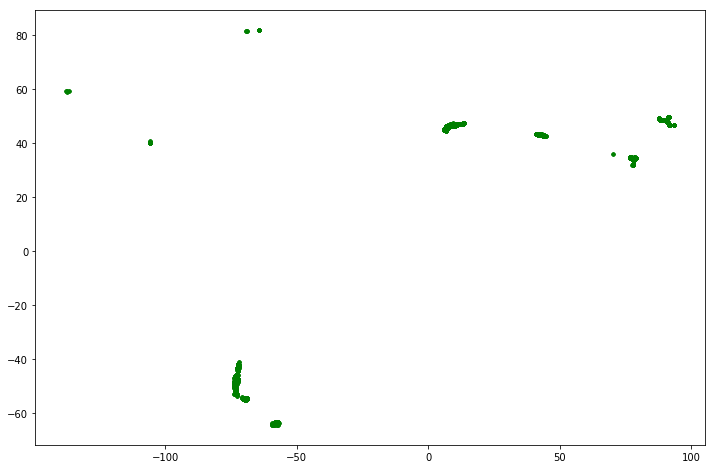

In [26]:
fig, ax = plt.subplots(1,1,figsize=(12,8))
ax.scatter(glims['longitude'], glims['latitude'], color='green', marker='.')

In [27]:
#export as a CSV 
glims.to_csv(r"TestingDataSet_v1.csv", index=False, header=True)

In [28]:
glims.GEOG_AREA.unique()

array(['Antarctic Peninsula',
       'Randolph Glacier Inventory; Umbrella RC for merging the RGI into GLIMS',
       'Chilean glaciers, between -18 and -56 degrees latitude', 'Chile',
       'Northern Cordillera', 'Alaska', 'Various (NSIDC)', 'Mongolia',
       'Various (GlobGlacier)', 'Himalaya (India, Nepal, Bhutan)',
       'French Alps', 'Swiss Alps', 'Italy',
       'Southwestern Asia (Pakistan + Afghanistan)', 'Conterminous USA',
       'China', 'Khumbu Area', 'Italian Alps', 'Austrian Alps',
       'Caucausus Region', 'Siberian Mountains',
       'Russian Glaciers (exact boundaries of RC to be defined)'],
      dtype=object)